In [1]:
import argparse
import torch
#from sheaffmtl import run_dig_sheaf_fmtl, run_ana_sheaf_fmtl
#from utils import read_vehicle_data, read_school_data, read_har_data, read_gleam_data, count_model_parameters, MultinomialLogisticRegression, LinearRegression, generate_random_adjacency_matrix, cross_entropy_loss_with_l2, mse_loss_with_l2, TwoSectionH, seq_scheduling
import torch.nn as nn
import numpy as np
import networkx as nx
from scipy.linalg import hadamard
import matplotlib.pyplot as plt

In [2]:
def generate_random_adjacency_matrix(n, edge_probability=0.2, seed=42):
    while True:
        g = nx.generators.random_graphs.binomial_graph(n, edge_probability, seed=seed)
        if nx.is_connected(g):
            return nx.adjacency_matrix(g).toarray()

In [3]:
num_clients = 30
print(f"Number of clients {num_clients}")
#print(f"Number of features {client_train_datasets[0][0][0].shape}")

adjacency_matrix = generate_random_adjacency_matrix(num_clients)
neighbors = [np.nonzero(adjacency_matrix[i])[0].tolist() for i in range(num_clients)]
G = nx.from_numpy_array(adjacency_matrix)

Number of clients 30


In [4]:
def dig_comp_level(G, CG, N, Chi, barP, N0 = 10 ** (-169/10) * 1e-3, b = 64, d = 7850):
    K = CG.shape[0]
    m_array = [int( N / Chi * np.log2(1 + barP * Chi / N0 * min(CG[i,[j for j in G[i]]]))) for i in range(K)]
    m_array = np.ceil(np.maximum(np.minimum(np.array(m_array) / b, d), 1))

    return m_array

In [5]:
num_clients = 30
adjacency_matrix = generate_random_adjacency_matrix(num_clients)
G = nx.from_numpy_array(adjacency_matrix)
neighbors = [np.nonzero(adjacency_matrix[i])[0].tolist() for i in range(num_clients)]
color_dict = {
    0: 'r',    # Red
    1: 'b',    # Blue
    2: 'g',    # Green
    3: 'c',    # Cyan
    4: 'm',    # Magenta
    5: 'y',    # Yellow
    6: 'k',    # Black
    7: 'orange',
    8: 'purple',
    9: 'brown',
    10: 'pink'
}

{0: array([0.25248344, 0.22388741]), 1: array([-0.59526312, -0.54591275]), 2: array([ 0.71665896, -0.2852078 ]), 3: array([0.32997067, 0.07463023]), 4: array([ 0.15385946, -0.51206202]), 5: array([-0.06404341,  0.9601984 ]), 6: array([-0.35326666,  0.0565623 ]), 7: array([0.06227378, 0.32949039]), 8: array([-0.05255878, -0.13553084]), 9: array([ 0.71546547, -0.05570563]), 10: array([-0.33163576,  0.51223448]), 11: array([-0.86820639,  0.4755672 ]), 12: array([-0.29924888, -0.47128873]), 13: array([ 0.36969307, -0.09952417]), 14: array([-0.15645471,  0.00551491]), 15: array([ 0.33878715, -0.62190344]), 16: array([ 1.        , -0.49599244]), 17: array([-0.72916986, -0.2257861 ]), 18: array([-0.56772787,  0.15520892]), 19: array([-0.07409411, -0.61232243]), 20: array([0.64826005, 0.34581467]), 21: array([-0.05436931, -0.82080946]), 22: array([-0.95257388,  0.93336311]), 23: array([-0.40009137,  0.314392  ]), 24: array([-0.20350488,  0.53322187]), 25: array([0.05012448, 0.50130985]), 26: a

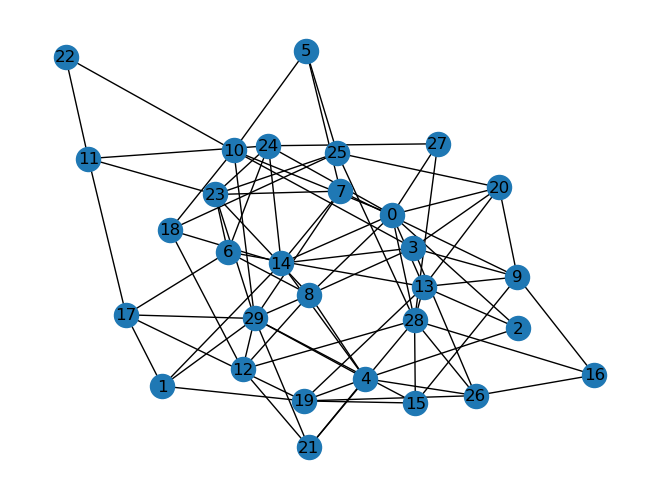

In [7]:

pos = nx.spring_layout(G)
print(pos)
nx.draw(G, pos, with_labels=True)
plt.show()

In [8]:
color_dict = {
    0: 'r',    # Red
    1: 'b',    # Blue
    2: 'g',    # Green
    3: 'c',    # Cyan
    4: 'm',    # Magenta
    5: 'y',    # Yellow
    6: 'k',    # Black
    7: 'orange',
    8: 'purple',
    9: 'brown',
    10: 'pink'
}

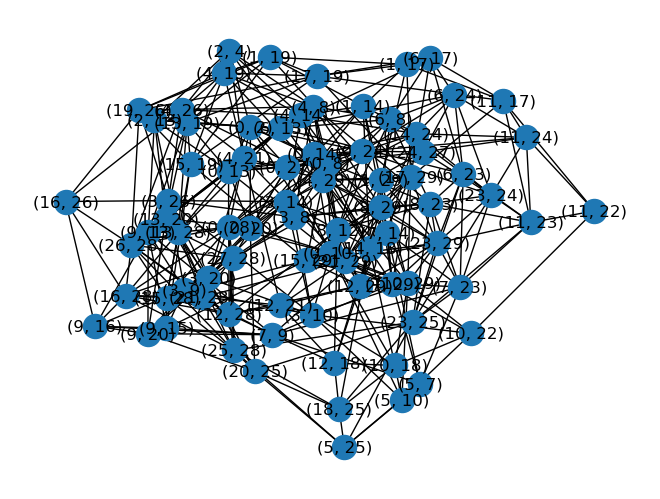

In [9]:
F = nx.line_graph(G)
pos2 = nx.spring_layout(F)
nx.draw(F, pos2, with_labels=True)
plt.show()

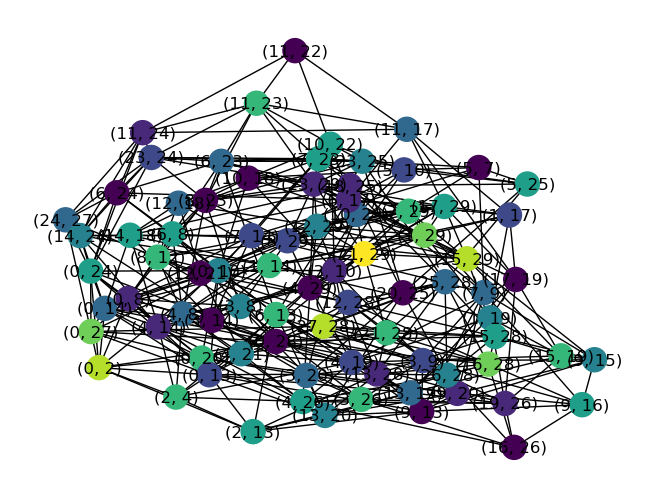

Number of colors needed 10
The maximum degree of the graph is 10


In [10]:
edges_to_colors = nx.coloring.greedy_color(F, strategy="largest_first")
color_map_nodes = []
color_map_edges = []
for node in F:
  color_map_nodes.append(edges_to_colors[node])

for edge in G.edges():
  color_map_edges.append(edges_to_colors[edge])
pos2 = nx.spring_layout(F)
nx.draw(F, pos2, with_labels=True, node_color=color_map_nodes)
plt.show()
max_degree = max(dict(G.degree()).values())
print(f"Number of colors needed {max([x for x in color_map_nodes]) + 1}")
print(f"The maximum degree of the graph is {max_degree}")


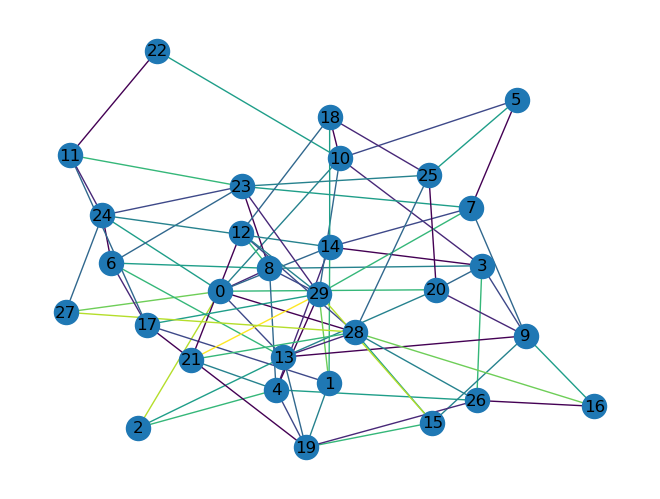

In [11]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, edge_color=color_map_edges)
plt.show()

In [12]:
# Group edges by color
edges_by_color = {}
for edge, color in edges_to_colors.items():
    if color not in edges_by_color:
        edges_by_color[color] = []
    edges_by_color[color].append(edge)

# Create and visualize each subgraph for each color
subgraphs = {}
laplacians = {}

for color, edges in edges_by_color.items():
    # Create a new subgraph with all nodes from G but only the selected edges
    subgraph = nx.Graph()
    subgraph.add_nodes_from(G.nodes())  # Add all nodes
    subgraph.add_edges_from(edges)      # Add only edges of this color
    subgraphs[color] = subgraph
    # Calculate the Laplacian matrix for the subgraph
    laplacian_matrix = nx.laplacian_matrix(subgraph).toarray()
    laplacians[color] = laplacian_matrix

# Example to print details
for color, subgraph in subgraphs.items():
    print(f"Subgraph for color {color}:")
    print("Nodes:", subgraph.nodes())
    print("Edges:", subgraph.edges())

Subgraph for color 0:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Edges: [(0, 28), (3, 14), (4, 29), (5, 7), (6, 24), (8, 23), (9, 13), (10, 18), (11, 22), (12, 21), (16, 26), (17, 19), (20, 25)]
Subgraph for color 1:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Edges: [(0, 8), (3, 10), (4, 14), (6, 17), (9, 20), (11, 24), (13, 28), (18, 25), (19, 26), (23, 29)]
Subgraph for color 2:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Edges: [(0, 13), (1, 17), (3, 9), (4, 19), (5, 10), (7, 14), (8, 29), (12, 28), (23, 24)]
Subgraph for color 3:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Edges: [(0, 14), (3, 20), (4, 8), (6, 23), (7, 9), (10, 29), (11, 17), (12, 18), (13, 19), (24, 27), (25, 28)]
Subgrap

In [13]:
import cvxpy as cp
from cvxpy.atoms.lambda_sum_smallest import lambda_sum_smallest

In [14]:
x_dif = 1/np.sqrt(2) * (np.random.randn(len(laplacians), 1) + 1j * np.random.randn(len(laplacians), 1))
L_gap = np.real(x_dif * x_dif.conj()).reshape(-1)
print(L_gap)

[2.15077071 7.82029702 2.5452603  0.14840335 1.26740029 1.81397757
 1.13580236 0.78747084 0.23274356 0.11625363]


In [27]:
# Given problem parameters
n = len(laplacians)  # Example dimension (replace with actual dimension)

mu = 0.1  # Given parameter mu (adjust as needed)

# Define variables
#lambda_2 = cp.Variable()
x = cp.Variable(n)  # x is a vector with `n` entries

algebraic_connectivity = lambda_sum_smallest(sum(x[i] * laplacians[i] for i in range(n)), 2)
L_gap_distance = sum(x[i] * L_gap[i] for i in range(n))
alpha = 0.1

In [28]:
# Define objective
objective = cp.Maximize(algebraic_connectivity + alpha * L_gap_distance)

In [60]:

# Define constraints
constraints = [
    x >= 0,          # Elementwise inequality 0 <= x
    cp.sum(x) <= 0.5 * n, # Elementwise inequality x <= 1
    x <= 1
]

# Formulate and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Output results
print("Optimal value of lambda_2:", problem.value)
print("Optimal values of x:", x.value)

Optimal value of lambda_2: 2.221383630668311
Optimal values of x: [ 9.36995581e-01  9.99992605e-01  3.62839936e-01  4.60797635e-01
  2.49592953e-01  9.57636663e-01  4.59554194e-01  1.48025325e-01
  4.24583203e-01 -5.87909296e-06]


In [61]:
laplacian_matrix = nx.laplacian_matrix(G).toarray()
# Compute eigenvalues
eigenvalues = np.linalg.eigvals(laplacian_matrix)

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)

# Get the second largest eigenvalue
second_smallest_eigenvalue = eigenvalues_sorted[1]
print("Second smallest eigenvalue:", second_smallest_eigenvalue)


Second smallest eigenvalue: 1.2994161818610437


In [62]:
probabilities = np.clip(x.value, 0, 1, out=None)

# Original list of elements
elements = np.ones(len(probabilities), np.int32)


# Define the number of trials for each element (for example, 1 trial per element)
n_trials = 1

# Generate the new list with binomial sampling
sampled_elements = [np.random.binomial(n_trials, p) * element for element, p in zip(elements, probabilities)]
print(sampled_elements)


[0, 1, 0, 0, 0, 1, 1, 0, 1, 0]


In [63]:
probabilities

array([0.93699558, 0.99999261, 0.36283994, 0.46079764, 0.24959295,
       0.95763666, 0.45955419, 0.14802533, 0.4245832 , 0.        ])

In [64]:

num_clients = 30

adjacency_matrix = generate_random_adjacency_matrix(num_clients)
# Subgraph sampling
G = nx.from_numpy_array(adjacency_matrix)
F = nx.line_graph(G)
edges_to_colors = nx.coloring.greedy_color(F, strategy="largest_first")
color_map_nodes = []
color_map_edges = []
for node in F:
    color_map_nodes.append(edges_to_colors[node])

for edge in G.edges():
    color_map_edges.append(edges_to_colors[edge])

# Group edges by color
edges_by_color = {}
for edge, color in edges_to_colors.items():
    if color not in edges_by_color:
        edges_by_color[color] = []
    edges_by_color[color].append(edge)

# Create and visualize each subgraph for each color
subgraphs = {}
laplacians = {}

for color, edges in edges_by_color.items():
    # Create a new subgraph with all nodes from G but only the selected edges
    subgraph = nx.Graph()
    subgraph.add_nodes_from(G.nodes())  # Add all nodes
    subgraph.add_edges_from(edges)      # Add only edges of this color
    subgraphs[color] = subgraph
    # Calculate the Laplacian matrix for the subgraph
    laplacian_matrix = nx.laplacian_matrix(subgraph).toarray()
    laplacians[color] = laplacian_matrix    

In [66]:
sub_graphs = []
for color, L in laplacians.items():
    A = np.diag(np.diag(L)) - L 
    G_v = nx.from_numpy_array(A)
    sub_graphs.append(G_v)


for i in range(10):
    G_merged = nx.Graph()
    for p, sub_g in zip(sampled_elements, sub_graphs):
        if p:
            G_merged = nx.compose(G_merged, sub_g)
    La = nx.laplacian_matrix(G_merged).toarray()
    Lb = nx.laplacian_matrix(G).toarray()
    print(np.linalg.norm(La - Lb))

20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
20.97617696340303
0 28
3 14
4 29
5 7
6 24
7 5
8 23
9 13
10 18
11 22
12 21
13 9
14 3
16 26
17 19
18 10
19 17
20 25
21 12
22 11
23 8
24 6
25 20
26 16
28 0
29 4
0 8
3 10
4 14
6 17
8 0
9 20
10 3
11 24
13 28
14 4
17 6
18 25
19 26
20 9
23 29
24 11
25 18
26 19
28 13
29 23
0 13
1 17
3 9
4 19
5 10
7 14
8 29
9 3
10 5
12 28
13 0
14 7
17 1
19 4
23 24
24 23
28 12
29 8
0 14
3 20
4 8
6 23
7 9
8 4
9 7
10 29
11 17
12 18
13 19
14 0
17 11
18 12
19 13
20 3
23 6
24 27
25 28
27 24
28 25
29 10
0 10
1 19
3 8
4 21
8 3
9 15
10 0
12 29
13 20
14 24
15 9
19 1
20 13
21 4
23 25
24 14
25 23
26 28
28 26
29 12
0 24
2 13
4 26
5 25
6 8
7 23
8 6
9 16
10 22
13 2
14 18
15 28
16 9
17 29
18 14
22 10
23 7
24 0
25 5
26 4
28 15
29 17
0 20
1 14
2 4
3 26
4 2
6 13
7 29
8 12
11 23
12 8
13 6
14 1
15 19
19 15
20 0
21 28
23 11
26 3
28 21
29 7
0 27
1 29
16 28
27 0
28 16
29 1
0 

In [67]:
L_gaps = []
 
for sub_g in sub_graphs:
    L_gap = 0
    for node in range(num_clients):
        for neighbor in sub_g.neighbors(node):
            print(node, neighbor)
    print("End subgraph")

0 28
3 14
4 29
5 7
6 24
7 5
8 23
9 13
10 18
11 22
12 21
13 9
14 3
16 26
17 19
18 10
19 17
20 25
21 12
22 11
23 8
24 6
25 20
26 16
28 0
29 4
End subgraph
0 8
3 10
4 14
6 17
8 0
9 20
10 3
11 24
13 28
14 4
17 6
18 25
19 26
20 9
23 29
24 11
25 18
26 19
28 13
29 23
End subgraph
0 13
1 17
3 9
4 19
5 10
7 14
8 29
9 3
10 5
12 28
13 0
14 7
17 1
19 4
23 24
24 23
28 12
29 8
End subgraph
0 14
3 20
4 8
6 23
7 9
8 4
9 7
10 29
11 17
12 18
13 19
14 0
17 11
18 12
19 13
20 3
23 6
24 27
25 28
27 24
28 25
29 10
End subgraph
0 10
1 19
3 8
4 21
8 3
9 15
10 0
12 29
13 20
14 24
15 9
19 1
20 13
21 4
23 25
24 14
25 23
26 28
28 26
29 12
End subgraph
0 24
2 13
4 26
5 25
6 8
7 23
8 6
9 16
10 22
13 2
14 18
15 28
16 9
17 29
18 14
22 10
23 7
24 0
25 5
26 4
28 15
29 17
End subgraph
0 20
1 14
2 4
3 26
4 2
6 13
7 29
8 12
11 23
12 8
13 6
14 1
15 19
19 15
20 0
21 28
23 11
26 3
28 21
29 7
End subgraph
0 27
1 29
16 28
27 0
28 16
29 1
End subgraph
0 2
2 0
15 29
27 28
28 27
29 15
End subgraph
21 29
29 21
End subgraph
